In [109]:
import sys
import numpy as np
from numpy import random  
import matplotlib.pyplot as plt
from IPython.display import clear_output, display   # needed only in jupyter notebook to plot 2D matrix dramatically, no need in IDE

In [110]:
# Define Temperature filed calculation function
def Laplacian(T, h, nx, ny):
    TT = np.copy(T)
    # Note: not change the values of all boundry points
    for i in range(1, ny-1):
        for j in range(1, nx-1):
            TT[i,j] = (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1] - 4*T[i, j]) / h**2
    return TT

In [111]:
# 1) Input: set global parameters
# Note: t means Time, T means Temperature field !!!
nx = 100      # grid points of x-axis
ny = 50       # grid points of y-axis
k = 1.0       # diffusivity constant
a = 0.2       # time step constant
t = 0         # start time
t_end = 0.05  # end time
T0 = 'Random'  # Two initial modes: Spike / Random
# Figure parameters
fontsize_large = 14
fontsize_mid = 12
fontsize_small = 10

In [112]:
# 2) Initialization: calculate related parameters
h = 1 / (ny-1)
dt = a * h**2 / k
# set the initial temperature field according to T0
if T0 == 'Spike':
    T = np.zeros((ny, nx))
    T[25-1, 50-1] = 1
elif T0 == 'Random':
    T = np.pad(random.rand(ny-2, nx-2), (1,1))
    T[25-1, 50-1] = 1
else:
    print("T0 doesn't meet the requirments, please modify.")
    sys.exit()

KeyboardInterrupt: 

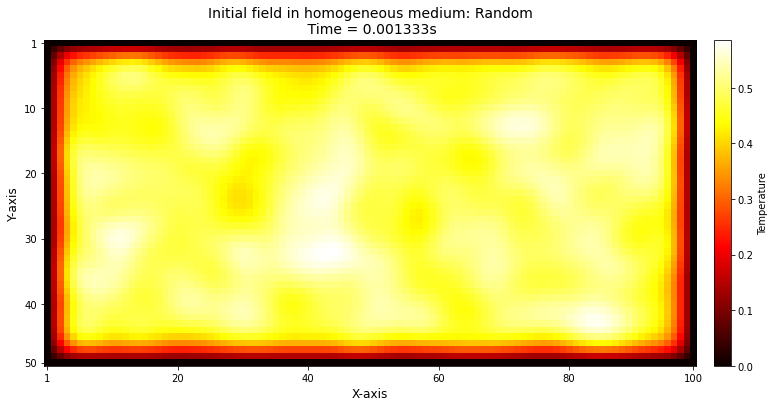

In [113]:
# 3) Iteration and plotting
# Create a canvas and axis
fig, ax = plt.subplots(figsize = (12,6))
# Create a new axis for colorbar
cax = fig.add_axes([ax.get_position().x1 + 0.01,  # 关于图像右下角x1坐标的水平(向右)偏移+0.03
                    ax.get_position().y0,         # 关于图像右下角y0坐标的垂直偏移0 —— 上下对齐
                    0.02,                         # 新轴的宽度0.02
                    ax.get_position().height])    # 新轴的高度 = 原轴的高度

# Iteration
while t < t_end:
    # Calculate the second-order derivative
    T = T + dt * k * Laplacian(T, h, nx, ny)
    # Clear colorbar axis
    cax.clear()
    # Plotting
    image = ax.imshow(T, cmap = 'hot')            # draw on the axis
    # Colorbar
    clb = fig.colorbar(image, cax = cax)                         # use the other axis
    clb.ax.set_ylabel('Temperature', fontsize = fontsize_small)  # set the y-axis label
    # Set the labels and tricks
    ax.set_xlabel('X-axis', fontsize = fontsize_mid)
    ax.set_ylabel('Y-axis', fontsize = fontsize_mid)
    ax.set_title('Initial field in homogeneous medium: %s\n Time = %fs' % (T0, t), fontsize = fontsize_large)
    ax.set_xticks([0, 20, 40, 60, 80, 99])                     # set x-axis tricks
    ax.set_xticklabels(['1', '20', '40', '60', '80', '100'])   # rename tricks
    ax.set_yticks([0, 10, 20, 30, 40, 49])                     # set y-axis tricks
    ax.set_yticklabels(['1', '10', '20', '30', '40', '50'])    # rename tricks
    # Update the time
    t = t + dt
    # Image show
    clear_output(wait = True)
    # Display
    display(fig)

# Save final result
plt.savefig('test.png', bbox_inches = 'tight', dpi = 400)